# 3장 케라스와 텐서플로우

__감사말__: 프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 3장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

__구글 코랩 설정__: '런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
이후 아래 명령어를 실행했을 때 오류가 발생하지 않으면 필요할 때 GPU가 자동 사용된다.

```
!nvidia-smi
```

구글 코랩에서 사용되는 tensorflow 버전을 확인하려면 아래 명령문을 실행한다.

```python
import tensorflow as tf
tf.__version__
```

tensorflow가 GPU를 사용하는지 여부를 알고 싶으면 
주피터 노트북 등 사용하는 편집기 및 파이썬 터미널에서 아래 명령문을 실행한다.

```python
import tensorflow as tf
tf.config.list_physical_devices('GPU')
```

## 주요 내용

- 딥러닝 필수 요소
- 케라스와 텐서플로우 간략 소개
- 텐서플로우, 케라스, GPU를 활용한 딥러닝 작업환경
- 케라스와 텐서플로우를 이용한 신경망의 핵심 구성요소 구현

## 3.1 텐서플로우 소개

### 텐서플로우

- 구글을 중심으로 개발된 머신러닝 __플랫폼__(platform)
    - TF-Agents: 강화학습 연구 지원
    - TFX: 머신러닝 프로젝트 진행과정(workflow) 운영 지원
    - TF-Hub: 훈련된 모델 제공
- 파이썬 기반
- 텐서 연산 지원

### 넘파이(Numpy)와의 차이점

- 미분 가능한 함수들의 그레이디언트 자동 계산
- GPU, TPU 등 고성능 병렬 하드웨어 가속기 활용 가능
    - 높은 확장성: 일기예보, 바둑 프로그램 등 매우 많은 데이터와 계산이 요구되는 실전 상황에 활용됨.
- C++(게임), 자바스크립트(웹브라우저), TFLite(모바일 장치) 등 다른 언어가 선호되는 
    도메인 특화 프로그램에 쉽게 이식 가능

## 3.2 케라스

### 케라스와 텐서플로우

- 딥러닝 모델 훈련에 최적화된 인터페이스 제공.
- 원래 텐서플로우와 독립적으로 시작됨.
- 텐서플로우 2.0부터 텐서플로우 라이브러리의 최상위 프레임워크(framework)로 포함됨.
- 다양한 워크플로우 제공: 모델 구축과 훈련 방식에 있어서 고수준/저수준 방식 모두 제공

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/keras_and_tf.png" style="width:650px;"></div>

그림 출처: [Deep Learning with Python(Manning MEAP)](https://www.manning.com/books/deep-learning-with-python-second-edition)

## 3.3 케라스와 텐서플로우의 약력

- 2007년: 씨아노(Theano) 공개. 캐나다 몬트리올 대학교 연구팀.
    - 계산 그래프, 미분 자동화 등을 최초로 활용
- 2015년 3월: 케라스 라이브러리 공개
    - 씨아노(Theano)를 백앤드로 사용하는 고수준 패키지
- 2015년 11월: 텐서플로우 라이브러리 공개
- 2016년: 텐서플로우가 케라스의 기본 백엔드로 지정됨
- 2017년: 씨아노, 텐서플로우, CNTK(마이크로소프트), MXNet(아마존)이 케라스의 백엔드로 지원됨.
- 2019년 9월: 텐서플로우 2.0부터 케라스가 텐서플로우의 최상위 프레임워크로 지정됨.

## 3.4 딥러닝 작업환경

### GPU 활용 옵션

- 개인 NVIDIA 그래픽카드가 장착된 PC 또는 노트북 사용
    - 딥러닝을 많이 활용하는 경우
    - Ubuntu 설치 또는 WSL(Windows Subsystem for Linux) 활용 추천
- 구글 클라우드 플랫폼 또는 아마존 웹서비스(AWS EC2) 활용
    - 단기간동안 고성능 컴퓨터를 활용하고자 하는 경우
- __구글 코랩 활용__
    - 강좌 이수 용도로 추천

### 구글 코랩 사용

- 기본 사용법은 인터넷 검색 참조
- 코드 실행에 필요한 추가 패키지 설치는 pip(파이썬 패키지 관리자) 활용
    ```python
    !pip install package_name
    ```
- 참고: 느낌표(`!`)는 주피터 노트북 코드셀에서 터미널 명령어를 실행하는 경우 사용
- GPU 활용: 런타임 유형을 GPU로 지정만 하면 됨.
- TPU 활용: 좀 더 복잡한 세팅 필요. 13장 참조.

## 3.5 텐서플로우 기본 사용법

### 신경망 모델 훈련 핵심 1: 텐서플로우 기본 API 활용 텐서 조작

1. 상수 텐서와 변수 텐서
    - 상수 텐서(constant tensor): 입출력 데이터 등 변하지 않는 텐서
    - 변수 텐서(variable): 모델 가중치, 편향 등 업데이트 되는 텐서
1. 텐서 연산: 덧셈, relu, 점곱 등
1. 역전파(backpropagation): 
    - 손실함수의 그레이디언트 계산 후 모델 가중치 업데이트
    - 그레이디언트 테이프(`GradientTape`) 이용

### 신경망 모델 훈련 핵심 2: 케라스 API 활용 모델 구성 및 훈련

1. 층(layer)과 모델: 층을 적절하게 쌓아 모델 구성
1. 손실 함수(loss function): 학습 방향을 유도하는 피드백 역할 수행
1. 옵티마이저(optimizer): 학습 방향을 정하는 기능 수행
1. 메트릭(metric): 정확도 등 모델 성능 평가 용도
1. 훈련 반복(training loop): 미니 배치 경사하강법 실행

### 텐서플로우 기본 API 활용법

In [1]:
import tensorflow as tf

#### 상수 텐서

상수 텐서는 한 번 생성되면 값을 수정할 수 없다.
딥러닝 연산에 많이 사용되는 상수 텐서는 다음과 같다.

- 1로만 이루어진 텐서

In [2]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


- 0으로만 이루어진 텐서

In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


- `normal()` 함수: 0과 1사이의 부동소수점을 정규분포를 따르도록 무작위적으로 선택
    - `mean`: 평균값
    - `stddev`: 표준편차

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.5089775]
 [ 1.4439589]
 [-1.1963764]], shape=(3, 1), dtype=float32)


- `uniform()` 함수: 지정된 구간에서 부동소수점을 균등분포를 따르도록 무작위적으로 선택
    - `minval`: 구간 최솟값
    - `maxval`: 구간 최댓값

In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.01940858]
 [0.5734079 ]
 [0.04751134]], shape=(3, 1), dtype=float32)


한 번 생성된 상수 텐서는 수정이 불가능하다. 

In [6]:
x[0, 0] = 1.0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

넘파이 어레이는 반면에 수정 가능하다.

In [7]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.0
print(x)

[[0. 1.]
 [1. 1.]]


#### 변수 텐서

신경망 모델 훈련 도중에 가중치 텐서는 업데이트될 수 있어야 한다.
이런 텐서는 변수 텐서로 선언해야 하며, 
`Variaible` 클래스로 감싼다.

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1517559 ],
       [-0.4734463 ],
       [ 0.48180017]], dtype=float32)>


`Variable` 클래스의 `assign()` 메서드를 활용하여 텐서 항목 전체 또는 
일부를 수정할 수 있다.

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

__주의사항__: 모양(shape)이 동일한 텐서를 사용해야 한다.

In [10]:
v.assign(tf.ones((3, 2)))

ValueError: Cannot assign to variable Variable:0 due to variable shape (3, 1) and value shape (3, 2) are incompatible

특정 항목을 수정하려면 인덱싱과 함께 사용한다.

In [11]:
v[0, 0]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [12]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

`assign_add()` 메서드는 변수 텐서에 대한 덧셈 연산을 수행한다.
단, 해당 객체의 항목이 업데이트된다.

In [13]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산

텐서 연산은 넘파이 어레이에 대한 연산과 거의 같다.
다음은 몇 가지 예제를 보여준다.

In [88]:
import numpy as np

a = np.array([[2., 1.],
              [3., -2.]], dtype=np.float32)

In [89]:
a = tf.convert_to_tensor(a)
a += tf.ones((2, 2))
print(a)

tf.Tensor(
[[ 3.  2.]
 [ 4. -1.]], shape=(2, 2), dtype=float32)


In [90]:
b = tf.square(a)
print(b)

tf.Tensor(
[[ 9.  4.]
 [16.  1.]], shape=(2, 2), dtype=float32)


In [91]:
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[1.7320508 1.4142135]
 [2.              nan]], shape=(2, 2), dtype=float32)


In [92]:
a = tf.nn.relu(a)
print(a)

tf.Tensor(
[[3. 2.]
 [4. 0.]], shape=(2, 2), dtype=float32)


In [93]:
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[1.7320508 1.4142135]
 [2.        0.       ]], shape=(2, 2), dtype=float32)


In [94]:
d = b + c
print(d)

tf.Tensor(
[[10.732051   5.4142137]
 [18.         1.       ]], shape=(2, 2), dtype=float32)


`matmul()` 곱셈은 넘파이의 점곱(dot) 연산자와 유사하게 작동하며
2차원 행렬모양의 텐서의 경우 행렬 곱으로 실행된다.

In [95]:
e = tf.matmul(a, b)
print(e)

tf.Tensor(
[[59. 14.]
 [36. 16.]], shape=(2, 2), dtype=float32)


곱셈 연산자(`*`)는 항목별 곱셈으로 처리된다.

In [96]:
e *= a
print(e)

tf.Tensor(
[[177.  28.]
 [144.   0.]], shape=(2, 2), dtype=float32)


### `GradientTape` API 다시 살펴 보기

그레이디언트 테이프는 텐서 변수에 의존하는 미분함수의 그레이디언트를 자동 계산해준다.
아래 코드는 제곱 함수의 미분을 계산한다.

$$
f(x) = x^2 \quad \Longrightarrow \quad \nabla f(x) = \frac{df(x)}{dx} = 2x
$$

In [23]:
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
    result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


그레이디언트 테이프 기능을 이용하여 신경망 모델 훈련 중에
손실 함수의 그레이디언트를 계산한다.

```python
gradient = tape.gradient(loss, weights)
```

- `loss`: `weights` 텐서 변수에 의존하는 손실 함수
- `weights`: 가중치 어레이

상수 텐서에 대해 그레이디언트 테이프를 이용하려면 `tape.watch()` 메서드로 감싸야 한다.

In [25]:
input_const = tf.constant(3.)

with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)

gradient = tape.gradient(result, input_const)

print(gradient)

None
tf.Tensor(6.0, shape=(), dtype=float32)


__참고__: 2차 미분도 가능하지만 여기서는 관심 대상이 아니다.

```python
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)

acceleration = outer_tape.gradient(speed, time)
```

### 선형 분류 신경망 구현

순수 텐서플로우 API만을 이용하여 선형 분류 신경망을 구현한다.
먼저, 분류에 사용할 데이터셋을 생성한다.

- `np.random.multivariate_normal()`
    - 다변량 정규분포를 따르는 데이터 생성
    - 평균값과 공분산 지정 필요
- 음성 데이터셋
    - 샘플 수: 1,000
    - 평균값: `[0, 3]`
    - 공분산: `[[1, 0.5],[0.5, 1]]`
- 양성 데이터셋
    - 샘플 수: 1,000
    - 평균값: `[3, 0]`
    - 공분산: `[[1, 0.5],[0.5, 1]]`

In [184]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [190]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [191]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

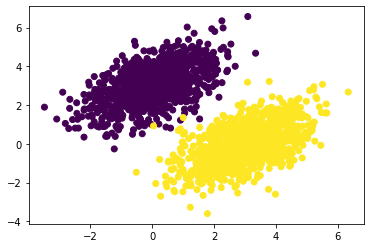

In [192]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [30]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [31]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [32]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [33]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [34]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.5515
Loss at step 1: 0.5852
Loss at step 2: 0.1935
Loss at step 3: 0.1328
Loss at step 4: 0.1170
Loss at step 5: 0.1079
Loss at step 6: 0.1004
Loss at step 7: 0.0936
Loss at step 8: 0.0874
Loss at step 9: 0.0817
Loss at step 10: 0.0766
Loss at step 11: 0.0720
Loss at step 12: 0.0677
Loss at step 13: 0.0638
Loss at step 14: 0.0603
Loss at step 15: 0.0571
Loss at step 16: 0.0542
Loss at step 17: 0.0515
Loss at step 18: 0.0491
Loss at step 19: 0.0469
Loss at step 20: 0.0448
Loss at step 21: 0.0430
Loss at step 22: 0.0413
Loss at step 23: 0.0398
Loss at step 24: 0.0384
Loss at step 25: 0.0372
Loss at step 26: 0.0360
Loss at step 27: 0.0350
Loss at step 28: 0.0340
Loss at step 29: 0.0331
Loss at step 30: 0.0323
Loss at step 31: 0.0316
Loss at step 32: 0.0310
Loss at step 33: 0.0304
Loss at step 34: 0.0298
Loss at step 35: 0.0293
Loss at step 36: 0.0289
Loss at step 37: 0.0285
Loss at step 38: 0.0281
Loss at step 39: 0.0278


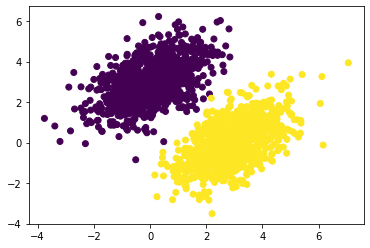

In [35]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

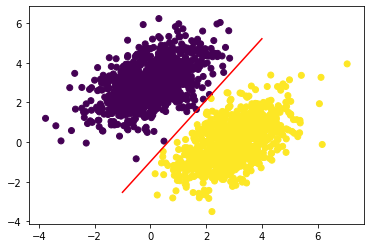

In [36]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 3.6 Anatomy of a neural network: understanding core Keras APIs

### Layers: the building blocks of deep learning

#### The base `Layer` class in Keras

In [0]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [0]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: building layers on the fly

In [0]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [0]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: configuring the learning process

In [0]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the `fit` method

**Calling `fit` with NumPy data**

In [0]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [0]:
history.history

### Monitoring loss & metrics on validation data

**Using the validation data argument**

In [0]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: using a model after training

In [0]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])